<a href="https://colab.research.google.com/github/shubhamlad21/502_msc2_mldl/blob/main/MLDL_practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 01 - Simple Linear Regression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/csv_files/Salary_Data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [5]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/3, random_state = 0)

In [7]:
print(x_train)

[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [8]:
print(x_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]


In [9]:
print(y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(x_test)

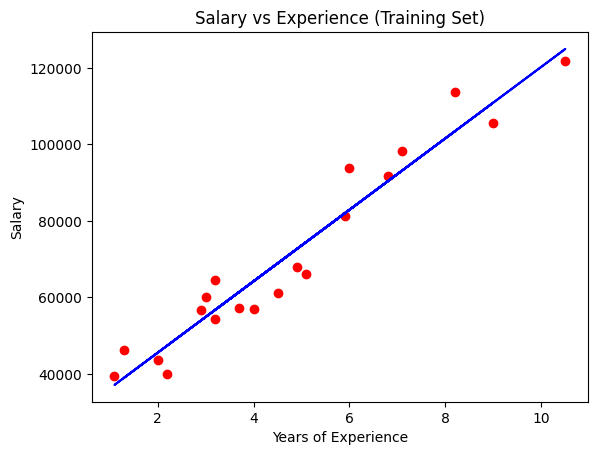

In [12]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

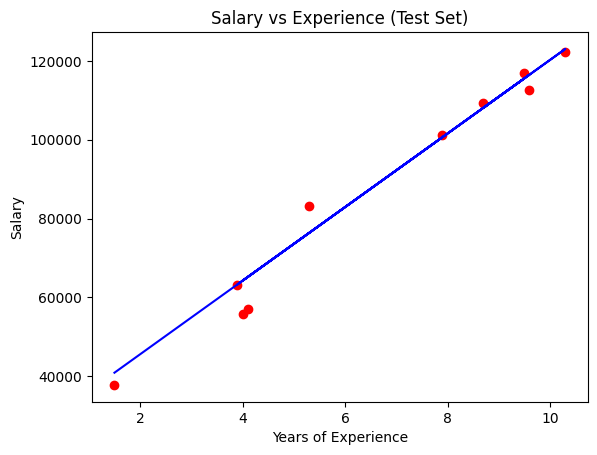

In [13]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Practical 02 - Multiple Linear Regression

In [14]:
dataset = pd.read_csv('/content/drive/MyDrive/csv_files/50_Startups.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [15]:
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [16]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [17]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [18]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [21]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


# Practical 03 - Logistic Regression



In [22]:
import pandas as pd

In [23]:
iris_data = pd.read_csv('/content/drive/MyDrive/csv_files/Iris.csv')

In [24]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data Cleaning

In [25]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Label Encoding

In [26]:
# Iris-setosa = 0 , Iris-versicolor = 1, Iris-virginica = 2

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

iris_data['Species'] = encoder.fit_transform(iris_data['Species'])

In [27]:
iris_data.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


Data Analysis

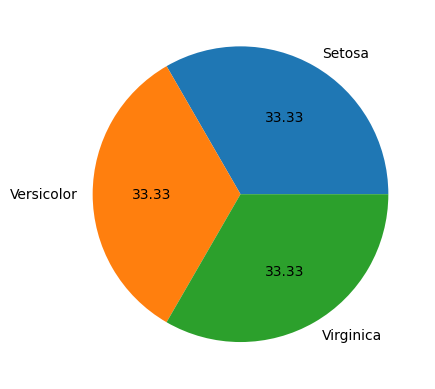

In [28]:
import matplotlib.pyplot as plt

plt.pie(iris_data['Species'].value_counts(),labels=['Setosa','Versicolor','Virginica'],autopct='%0.2f')
plt.show()

Create Dependent & Independent Variable

In [29]:
x = iris_data.drop('Species',axis=1)
y = iris_data['Species']
print(x)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [30]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


Split data into Train and test dataset

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Train the model

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)

model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Predict train data

In [33]:
pred_train = model.predict(x_train)

Check accuracy on train data

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_train,pred_train)

1.0

Predict test data

In [35]:
pred_test = model.predict(x_test)

Check accuracy and print Confusion matrix

In [36]:
accuracy_score(y_test,pred_test)
confusion_matrix(y_test,pred_test)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  8]])

# Practical 04 - KNeighbor

Importing the dataset

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
dataset=pd.read_csv('/content/drive/MyDrive/csv_files/Social_Network_Ads.csv')

In [39]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

Splitting the dataset into the training set and test set

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [41]:
#print(x_train)
print(x_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
print(x_train)

[[ 0.58 -0.89]
 [-0.61  1.46]
 [-0.01 -0.57]
 [-0.61  1.9 ]
 [ 1.37 -1.41]
 [ 1.47  1.  ]
 [ 0.09 -0.8 ]
 [-0.01 -0.25]
 [-0.21 -0.57]
 [-0.21 -0.19]
 [-0.31 -1.29]
 [-0.31 -0.57]
 [ 0.38  0.1 ]
 [ 0.88 -0.6 ]
 [ 2.07 -1.18]
 [ 1.08 -0.13]
 [ 0.68  1.78]
 [-0.71  0.56]
 [ 0.78  0.36]
 [ 0.88 -0.54]
 [-1.2  -1.58]
 [ 2.17  0.94]
 [-0.01  1.23]
 [ 0.19  1.08]
 [ 0.38 -0.48]
 [-0.31 -0.31]
 [ 0.98 -0.83]
 [ 0.98  1.87]
 [-0.01  1.26]
 [-0.9   2.27]
 [-1.2  -1.58]
 [ 2.17 -0.8 ]
 [-1.4  -1.47]
 [ 0.38  2.3 ]
 [ 0.78  0.77]
 [-1.   -0.31]
 [ 0.09  0.77]
 [-1.    0.56]
 [ 0.28  0.07]
 [ 0.68 -1.26]
 [-0.51 -0.02]
 [-1.8   0.36]
 [-0.71  0.13]
 [ 0.38  0.3 ]
 [-0.31  0.07]
 [-0.51  2.3 ]
 [ 0.19  0.04]
 [ 1.27  2.22]
 [ 0.78  0.27]
 [-0.31  0.16]
 [-0.01 -0.54]
 [-0.21  0.16]
 [-0.11  0.24]
 [-0.01 -0.25]
 [ 2.17  1.11]
 [-1.8   0.36]
 [ 1.87  0.13]
 [ 0.38 -0.13]
 [-1.2   0.3 ]
 [ 0.78  1.37]
 [-0.31 -0.25]
 [-1.7  -0.05]
 [-1.   -0.74]
 [ 0.28  0.5 ]
 [-0.11 -1.06]
 [-1.1   0.59]
 [ 0.09 -0

Testing

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

Prediciting a new result

In [45]:
print(classifier.predict(sc.transform([[40,20000]])))

[0]


Prediciting the test set results

In [46]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[64  4]
 [ 3 29]]


0.93

Visualising the Training set results

In [48]:
#from matplotlib .colors import ListedColormap
#x_set,y_set = sc.inverse_transform(x_train), y_train
#x1,x2=np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:,0].max()+10,step=1),
 #                np.arrange(start = x_set[:,1].min()-1000, stop=x_set[:,1].max())"""

#Practical 05 - SVC
30/06/2023 - SVC Notebook Colab


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [50]:
dataset=pd.read_csv('/content/drive/MyDrive/csv_files/Social_Network_Ads.csv')

In [51]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93


#  Practical 06 - Naive Bayes
01/07/2023

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [57]:
dataset=pd.read_csv('/content/drive/MyDrive/csv_files/Social_Network_Ads.csv')

In [58]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [61]:
print(x_train)

[[ 0.58 -0.89]
 [-0.61  1.46]
 [-0.01 -0.57]
 [-0.61  1.9 ]
 [ 1.37 -1.41]
 [ 1.47  1.  ]
 [ 0.09 -0.8 ]
 [-0.01 -0.25]
 [-0.21 -0.57]
 [-0.21 -0.19]
 [-0.31 -1.29]
 [-0.31 -0.57]
 [ 0.38  0.1 ]
 [ 0.88 -0.6 ]
 [ 2.07 -1.18]
 [ 1.08 -0.13]
 [ 0.68  1.78]
 [-0.71  0.56]
 [ 0.78  0.36]
 [ 0.88 -0.54]
 [-1.2  -1.58]
 [ 2.17  0.94]
 [-0.01  1.23]
 [ 0.19  1.08]
 [ 0.38 -0.48]
 [-0.31 -0.31]
 [ 0.98 -0.83]
 [ 0.98  1.87]
 [-0.01  1.26]
 [-0.9   2.27]
 [-1.2  -1.58]
 [ 2.17 -0.8 ]
 [-1.4  -1.47]
 [ 0.38  2.3 ]
 [ 0.78  0.77]
 [-1.   -0.31]
 [ 0.09  0.77]
 [-1.    0.56]
 [ 0.28  0.07]
 [ 0.68 -1.26]
 [-0.51 -0.02]
 [-1.8   0.36]
 [-0.71  0.13]
 [ 0.38  0.3 ]
 [-0.31  0.07]
 [-0.51  2.3 ]
 [ 0.19  0.04]
 [ 1.27  2.22]
 [ 0.78  0.27]
 [-0.31  0.16]
 [-0.01 -0.54]
 [-0.21  0.16]
 [-0.11  0.24]
 [-0.01 -0.25]
 [ 2.17  1.11]
 [-1.8   0.36]
 [ 1.87  0.13]
 [ 0.38 -0.13]
 [-1.2   0.3 ]
 [ 0.78  1.37]
 [-0.31 -0.25]
 [-1.7  -0.05]
 [-1.   -0.74]
 [ 0.28  0.5 ]
 [-0.11 -1.06]
 [-1.1   0.59]
 [ 0.09 -0

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
#y_pred = gnb.fit(x_train, y_train).predict(x_test)

GaussianNB()

Prediciting a new result

In [63]:
print(sc.transform([[30,87000]]))
print(gnb.predict(sc.transform([[40,200000]])))

[[-0.8  0.5]]
[1]


In [64]:
y_pred=gnb.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy: ", accuracy_score(y_test,y_pred))

[[65  3]
 [ 7 25]]
Accuracy:  0.9


# Practical 07 - Decision Tree Classifier
**07/07/2023**

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
dataset=pd.read_csv('/content/drive/MyDrive/csv_files/Social_Network_Ads.csv')

In [68]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [71]:
print(x_train)

[[ 0.58 -0.89]
 [-0.61  1.46]
 [-0.01 -0.57]
 [-0.61  1.9 ]
 [ 1.37 -1.41]
 [ 1.47  1.  ]
 [ 0.09 -0.8 ]
 [-0.01 -0.25]
 [-0.21 -0.57]
 [-0.21 -0.19]
 [-0.31 -1.29]
 [-0.31 -0.57]
 [ 0.38  0.1 ]
 [ 0.88 -0.6 ]
 [ 2.07 -1.18]
 [ 1.08 -0.13]
 [ 0.68  1.78]
 [-0.71  0.56]
 [ 0.78  0.36]
 [ 0.88 -0.54]
 [-1.2  -1.58]
 [ 2.17  0.94]
 [-0.01  1.23]
 [ 0.19  1.08]
 [ 0.38 -0.48]
 [-0.31 -0.31]
 [ 0.98 -0.83]
 [ 0.98  1.87]
 [-0.01  1.26]
 [-0.9   2.27]
 [-1.2  -1.58]
 [ 2.17 -0.8 ]
 [-1.4  -1.47]
 [ 0.38  2.3 ]
 [ 0.78  0.77]
 [-1.   -0.31]
 [ 0.09  0.77]
 [-1.    0.56]
 [ 0.28  0.07]
 [ 0.68 -1.26]
 [-0.51 -0.02]
 [-1.8   0.36]
 [-0.71  0.13]
 [ 0.38  0.3 ]
 [-0.31  0.07]
 [-0.51  2.3 ]
 [ 0.19  0.04]
 [ 1.27  2.22]
 [ 0.78  0.27]
 [-0.31  0.16]
 [-0.01 -0.54]
 [-0.21  0.16]
 [-0.11  0.24]
 [-0.01 -0.25]
 [ 2.17  1.11]
 [-1.8   0.36]
 [ 1.87  0.13]
 [ 0.38 -0.13]
 [-1.2   0.3 ]
 [ 0.78  1.37]
 [-0.31 -0.25]
 [-1.7  -0.05]
 [-1.   -0.74]
 [ 0.28  0.5 ]
 [-0.11 -1.06]
 [-1.1   0.59]
 [ 0.09 -0

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
print(sc.transform([[30,87000]]))
print(dtree.predict(sc.transform([[40,200000]])))

[[-0.8  0.5]]
[1]


In [74]:
y_pred=dtree.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy: ", accuracy_score(y_test,y_pred))

[[62  6]
 [ 4 28]]
Accuracy:  0.9


#Practical 08- k Means Clustering
14/07/2023

Importing the library

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [77]:
dataset=pd.read_csv('/content/drive/MyDrive/csv_files/Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values

In [78]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Training the k means model on the dataset

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualising the clusters

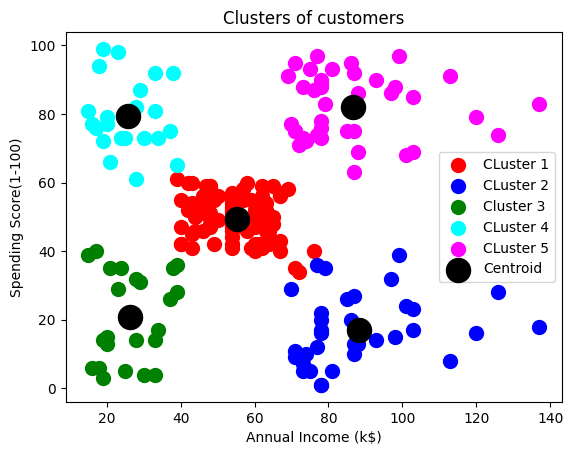

In [80]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s = 100, c='red', label='CLuster 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s = 100, c='blue', label='CLuster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s = 100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1], s = 100, c='cyan', label='CLuster 4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1], s = 100, c='magenta', label='CLuster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='Centroid')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()

# Practical 09 - Hierarchical Clustering
22/07/2023


In [81]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [82]:
# Importing the dataset
dataset=pd.read_csv('/content/drive/MyDrive/csv_files/Mall_Customers.csv')
# Extracting the matrix of features
x = dataset.iloc[:, [3, 4]].values

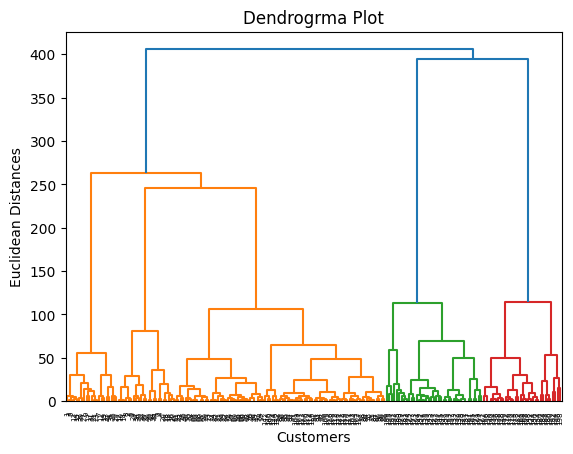

In [83]:
# Finding the optimal number of clusters using the dendrogram
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.title("Dendrogrma Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()

In [84]:
#training the hierarchical model on dataset
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred= hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


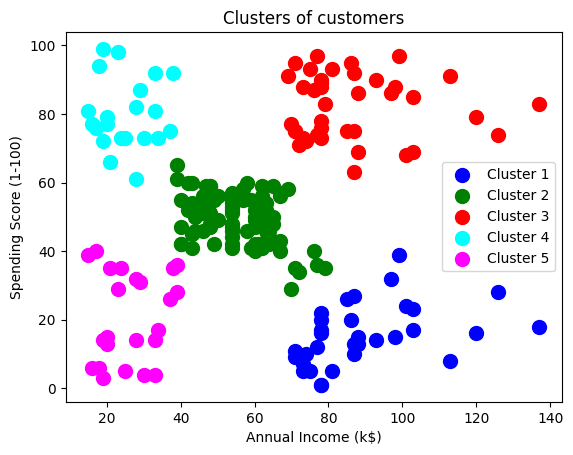

In [85]:
#visulaizing the clusters
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Practical 10 - Artificial Neural Network (ANN)

In [86]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [87]:
tf.__version__

'2.13.0'

**Part 1 - Data Preprocessing**

```
# Importing the dataset
```

In [88]:
dataset = pd.read_csv('/content/drive/MyDrive/csv_files/Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:,-1].values

In [89]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [90]:
print(y)

[1 0 1 ... 1 1 0]


**Encoding categorical data**

```
# Label Encoding the 'Gender' column
```

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])

In [92]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


**One Hot Encoding the 'Geography' column**

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [94]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Splitting the ds into the training set and test set**

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Part 2 - Building the ANN**


```
# Initializing the ANN
```



In [97]:
ann = tf.keras.models.Sequential()

```
# Adding the input and first hidden layer
```




In [98]:
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))

```
# Adding the second hidden layer
```

In [99]:
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))

```
# Adding the output layer
```

In [100]:
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

**Part 3 - Training the ANN**


```
# Compiling the ANN
```



In [101]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


```
Training the ANN on the TRaining Set
```

In [102]:
ann.fit(x_train,y_train, batch_size = 32, epochs = 10)

Epoch 1/10
250/250 [==============================] - 7s 3ms/step - loss: 0.5328 - accuracy: 0.7735
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4720 - accuracy: 0.7960
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4532 - accuracy: 0.7960
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4419 - accuracy: 0.7960
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4352 - accuracy: 0.7960
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4313 - accuracy: 0.7960
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.7960
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.7960
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4216 - accuracy: 0.7980
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4193 - accuracy: 0.8076

In [103]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) >0.5)

1/1 [==============================] - 0s 93ms/step
[[False]]


```
# Predicting the test set results
```

In [104]:
y_pred = ann.predict(x_test)
y_pred = (y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1580   15]
 [ 372   33]]


0.8065

# Practical 11 - CNN


In [106]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator as IDG

In [107]:
tf.__version__

'2.13.0'

In [108]:
#ls

In [109]:
#!unzip images.zip

In [110]:
train_datagen =IDG(rescale = 1./255,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MLDL/images',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 31 images belonging to 2 classes.


In [111]:
test_datagen = IDG(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MLDL/images',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode = 'binary')

Found 31 images belonging to 2 classes.


In [112]:
cnn = tf.keras.models.Sequential()

In [113]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (64,64,3)))

In [114]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [115]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [116]:
cnn.add(tf.keras.layers.Flatten())

In [117]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [118]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [119]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [120]:
cnn.fit(x = training_set, validation_data=test_set,epochs = 25)

Epoch 1/25
1/1 [==============================] - 8s 8s/step - loss: 0.6936 - accuracy: 0.4839 - val_loss: 0.7008 - val_accuracy: 0.4839
Epoch 2/25
1/1 [==============================] - 0s 187ms/step - loss: 0.7003 - accuracy: 0.4839 - val_loss: 0.8201 - val_accuracy: 0.5161
Epoch 3/25
1/1 [==============================] - 0s 193ms/step - loss: 0.7961 - accuracy: 0.5161 - val_loss: 0.6542 - val_accuracy: 0.5161
Epoch 4/25
1/1 [==============================] - 0s 194ms/step - loss: 0.6481 - accuracy: 0.5161 - val_loss: 0.6549 - val_accuracy: 0.6452
Epoch 5/25
1/1 [==============================] - 0s 180ms/step - loss: 0.6483 - accuracy: 0.6774 - val_loss: 0.6666 - val_accuracy: 0.5484
Epoch 6/25
1/1 [==============================] - 0s 191ms/step - loss: 0.6639 - accuracy: 0.5484 - val_loss: 0.6467 - val_accuracy: 0.6452
Epoch 7/25
1/1 [==============================] - 0s 184ms/step - loss: 0.6592 - accuracy: 0.6452 - val_loss: 0.6176 - val_accuracy: 0.7419
Epoch 8/25
1/1 [=======

In [122]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/MLDL/images/cat/cat_15.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = "Loaf"
else:
  prediction = "Cat"

1/1 [==============================] - 0s 364ms/step


Loaf


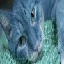

In [123]:
print(prediction)
#cv2.imshow(test_image[0])
from google.colab.patches import cv2_imshow
cv2_imshow(test_image[0])